<a href="https://colab.research.google.com/github/nicholasanthonys/learn-gan/blob/main/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

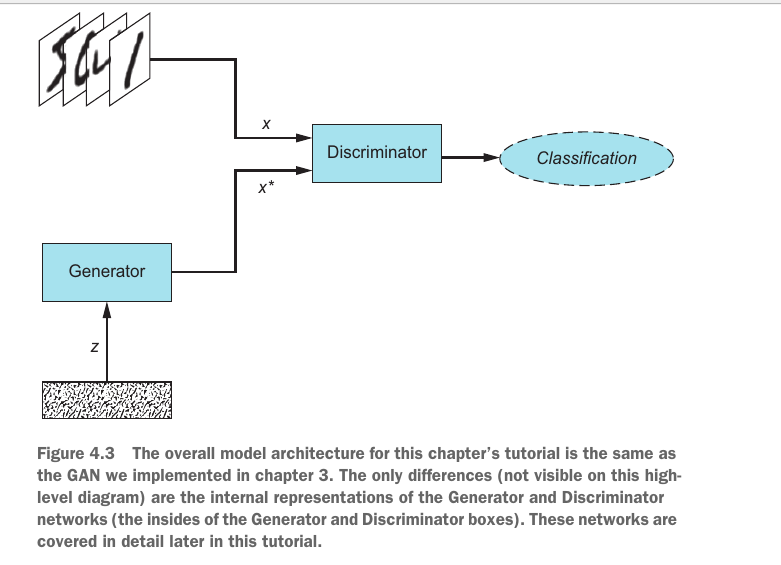

In [13]:
!nvidia-smi

Mon Oct 25 14:00:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    76W / 149W |   1089MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Importing modules and specifying model input dimensions
First, we import all the packages, modules, and libraries we need to train and run the
model. Just as in chapter 3, the MNIST dataset of handwritten digits is imported
directly from keras.datasets.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import (
Activation, BatchNormalization, Dense, Dropout, Flatten, Reshape)
from tensorflow.keras.layers  import LeakyReLU
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


We also specify the model input dimensions: the image shape and the length of the
noise vector z.


In [2]:
img_rows = 28
img_cols = 28
channels = 1

#Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
z_dim = 100


# Implementing the Generator
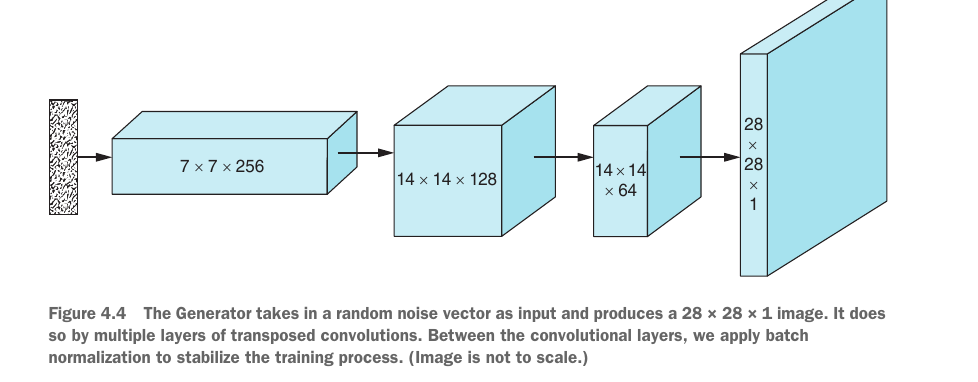
1. Take a random noise vector and reshape it into a 7 × 7 × 256 tensor through a
fully connected layer.
2. Use transposed convolution, transforming the 7 × 7 × 256 tensor into a 14 × 14
× 128 tensor.
3. Apply batch normalization and the Leaky ReLU activation function.
4. Use transposed convolution, transforming the 14 × 14 × 128 tensor into a 14 ×
14 × 64 tensor. Notice that the width and height dimensions remain unchanged;
this is accomplished by setting the stride parameter in Conv2DTranspose to 1.
5. Apply batch normalization and the Leaky ReLU activation function.
6. Use transposed convolution, transforming the 14 × 14 × 64 tensor into the out-
put image size, 28 × 28 × 1.
7. Apply the tanh activation function.


In [3]:
def build_generator(z_dim) :
  model = Sequential()

  #Reshapes input into 7 × 7 × 256 tensor via a fully connected layer
  model.add(Dense(256 * 7 * 7, input_dim=z_dim))
  model.add(Reshape((7, 7, 256)))

  #Transposed convolution layer, from 7 × 7 × 256 into 14 × 14 × 128 tensor
  model.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))

  #Batch normalization
  model.add(BatchNormalization())

  #Leaky ReLu activation
  model.add(LeakyReLU(alpha=0.01))

  #Transposed convolution layer, from 14 × 14 × 128 to 14 × 14 × 64 tensor
  model.add(Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'))

  # Batch normalization
  model.add(BatchNormalization())

  # Leaky ReLU activation
  model.add(LeakyReLU(alpha=0.01))

  # Transposed Convlution layer, from 14x14x64 to 28 x 28 x 1 tensor
  model.add(Conv2DTranspose(1, kernel_size=3, strides=2, padding='same'))

  # Output layer with tanh activation
  model.add(Activation('tanh'))

  return model

# Implementing the Discriminator
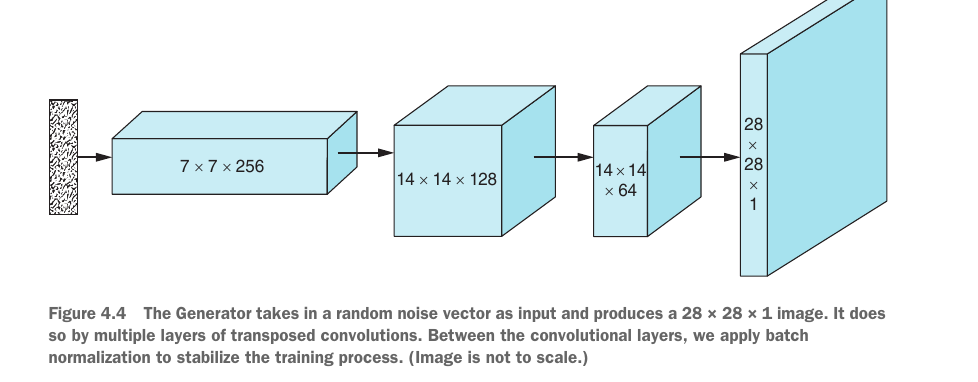

1. Use a convolutional layer to transform a 28 × 28 × 1 input image into a 14 × 14 × 32 tensor.
2. Apply the Leaky ReLU activation function.
3. Use a convolutional layer, transforming the 14 × 14 × 32 tensor into a 7 × 7 × 64 tensor.
4. Apply batch normalization and the Leaky ReLU activation function.
5. Use a convolutional layer, transforming the 7 × 7 × 64 tensor into a 3 × 3 × 128 tensor.
6. Apply batch normalization and the Leaky ReLU activation function.
7. Flatten the 3 × 3 × 128 tensor into a vector of size 3 × 3 × 128 = 1152.









In [4]:
def build_discriminator(img_shape) :

  model = Sequential()
  
  # Convolutional layer, from 28 x 28 x 1into 14 x 14 x 32 tensor
  model.add( Conv2D(32, kernel_size=3, strides=2, input_shape=img_shape, padding='same'))

  # Leaky ReLU activation
  model.add(LeakyReLU(alpha=0.01))

  # Convolutional layer, from 14 × 14 × 32 into 7 × 7 × 64 tensor
  model.add( Conv2D(64, kernel_size=3, strides=2, input_shape=img_shape, padding='same'))

  # Batch normalization
  model.add(BatchNormalization())
  
  # Leaky ReLU activation
  model.add(LeakyReLU(alpha=0.01))

  # Convolutional layer, from 7 × 7 × 64 tensor into 3 × 3 × 128 tensor
  model.add( Conv2D(128, kernel_size=3, strides=2, input_shape=img_shape, padding='same'))

  # Batch normalization
  model.add(BatchNormalization())

  # Leaky ReLU activation
  model.add(LeakyReLU(alpha=0.01))

  # Output layer with sigmoid activation
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  return model

# Building and running the DCGAN
Aside from the network architectures used for the Generator and the Discriminator,
the rest of the DCGAN network setup and implementation is the same as the one we
used for the simple GAN in chapter 3. This underscores the versatility of the GAN
architecture.

In [5]:
def build_gan(generator, discriminator) :
  model = Sequential()

  # Combined Generator + Discriminator model
  model.add(generator)
  model.add(discriminator)

  return model

In [6]:
# Builds and compiles the Discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Builds the Generator
generator = build_generator(z_dim)
# Keeps Discriminator’s parameters constant for Generator training

discriminator.trainable = False

# Builds and compiles GAN model with fixed Discriminator to train the Generator
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())


# DCGAN training loop


In [7]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
  # Sample random noise
  z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

  # Generates images from random noise
  gen_imgs = generator.predict(z)

  # Rescales image pixel values to [0, 1]
  gen_imgs = 0.5 * gen_imgs + 0.5

  # Sets image grid
  fig, axs = plt.subplots(image_grid_rows, image_grid_columns, figsize=(4, 4), sharey=True, sharex=True)

  cnt = 0

  for i in range(image_grid_rows):
    for j in range(image_grid_columns):
      # Outputs a grid of images
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1



In [8]:
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):
  # Load the MNIST dataset
  (X_train, _), (_, _) = mnist.load_data()

  # Rescales [0, 255] grayscale pixel values  to [–1, 1]
  X_train = X_train / 127.5 - 1.0
  X_train = np.expand_dims(X_train, axis=3)

  # Labels for real images: all 1s
  real = np.ones((batch_size, 1))

  # Labels for fake images : all 0s
  fake = np.ones((batch_size, 1))

  for iteration in range(iterations):
    # Gets a random batch of real images
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]

    # Generates a batch of fake images
    z = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(z)

    # Trains the Discriminator
    d_loss_real = discriminator.train_on_batch(imgs, real)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

    d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Generates a batch  of fake images
    z = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(z)

    # Trains the generator
    g_loss = gan.train_on_batch(z, real)

    if (iteration + 1) % sample_interval == 0:
      # Saves losses and accuracies so they can be plotted after training
      losses.append((d_loss, g_loss))
      accuracies.append(100.0 * accuracy)
      iteration_checkpoints.append(iteration + 1)

      # Outputs training progress
      print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

      # Outputs a sample generated image
      sample_images(generator)

Next, the following code is used to run the model.

11501568/11490434 [==============================] - 0s 0us/step
1000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
2000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
3000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
4000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
5000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
6000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
7000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
8000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
9000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
10000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
11000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
12000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
13000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
14000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
15000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]
16000 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.000000]


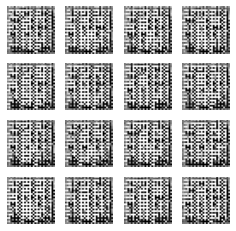

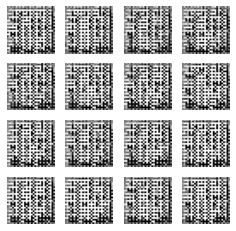

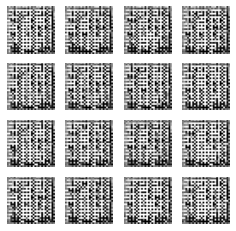

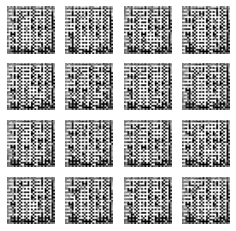

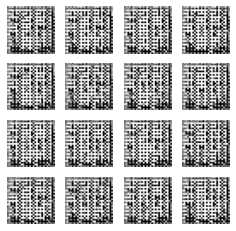

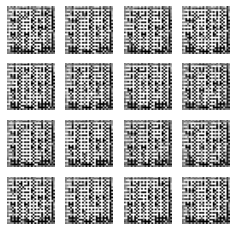

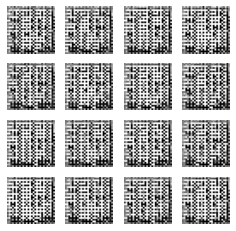

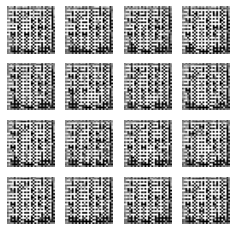

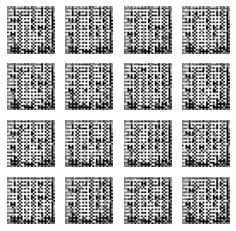

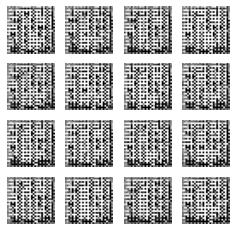

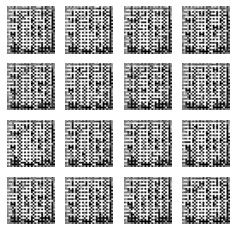

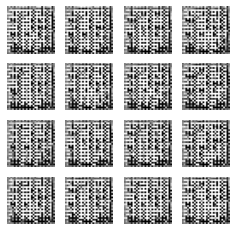

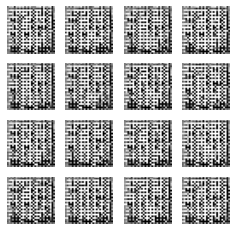

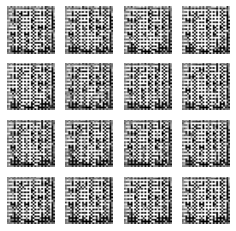

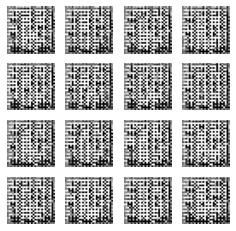

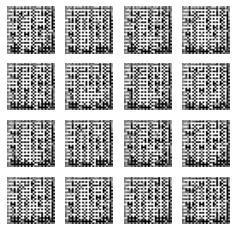

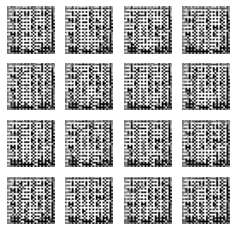

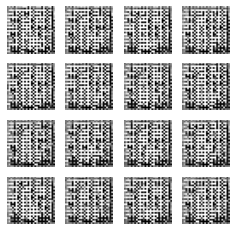

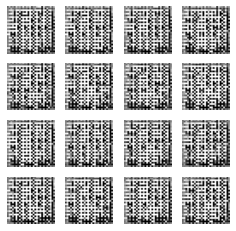

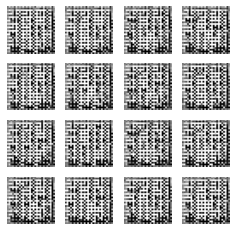

In [9]:
# Sets hyperparameters 
iterations = 20000
batch_size = 128
sample_interval = 1000

# Trains the DCGAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

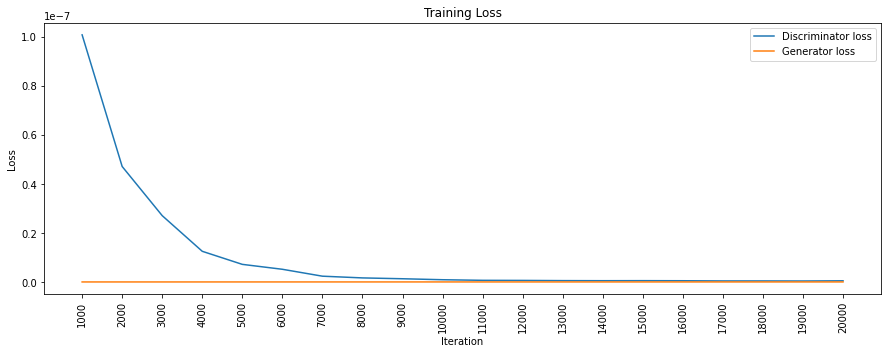

In [10]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

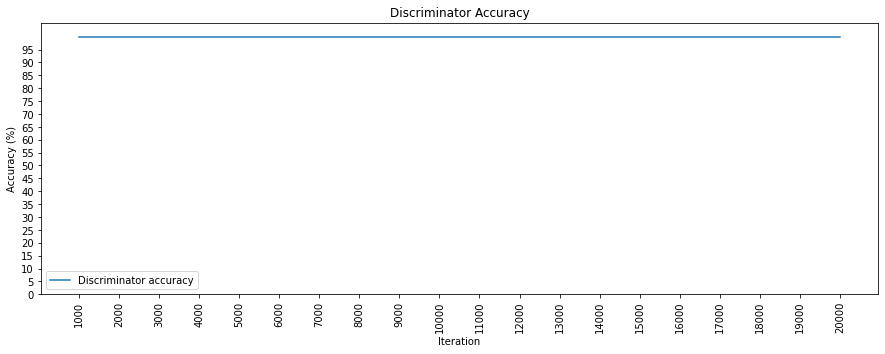

In [11]:
accuracies = np.array(accuracies)

# Plot Discriminator accuracy
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()

# Conclusion
DCGAN demonstrates the versatility of the GAN framework. In theory, the Discrimi-
nator and Generator can be represented by any differentiable function, even one as
complex as a multilayer convolutional network. However, DCGAN also demonstrates
that there are significant hurdles to making more complex implementations work in
practice. Without breakthroughs such as batch normalization, DCGAN would fail to
train properly.
In the following chapter, we will explore some of the theoretical and practical
limitations that make GAN training so challenging as well as the approaches to over-
come them.

# Summary
- Convolutional neural networks (ConvNets) use one or more convolutional fil-
ters that slide over the input volume. At each step as it slides over the input, a
filter uses a single set of parameters to produce a single activation value.
Together, all the activation values from all the filters produce the output layer.
- Batch normalization is a method that reduces the covariate shift (variations in
input value distributions between layers during training) in neural networks by
normalizing the output of each layer before it is passed as input to the next layer.
- Deep Convolutional GAN (DCGAN) is a Generative Adversarial Network with
convolutional neural networks as its Generator and Discriminator. This archi-
tecture achieves superior performance in image-processing tasks, including
handwritten digit generation, which we implemented in a code tutorial.
